## US Visa Approval Project

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objs as go

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import cufflinks as cf
from plotly.offline import iplot,init_notebook_mode

In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.read_csv("Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.shape

(25480, 12)

In [6]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Numerical & Categorical Features

In [8]:
num_features = [i for i in df.columns if df[i].dtype != 'O']
cat_features = [i for i in df.columns if df[i].dtype == 'O']

print("The dataset have {} Numerical features : {} ".format(len(num_features),num_features))
print("\nThe dataset have {} Categorical features : {} ".format(len(cat_features),cat_features))

The dataset have 3 Numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 

The dataset have 9 Categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'] 


# proportion of count data on categorical columns

In [9]:
for col in cat_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("----------------------")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
----------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
----------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
----------------------
region_of_employment
Northeast    28.237834
South        27.

## Univariate Analysis

Univariate Analysis for Numerical features

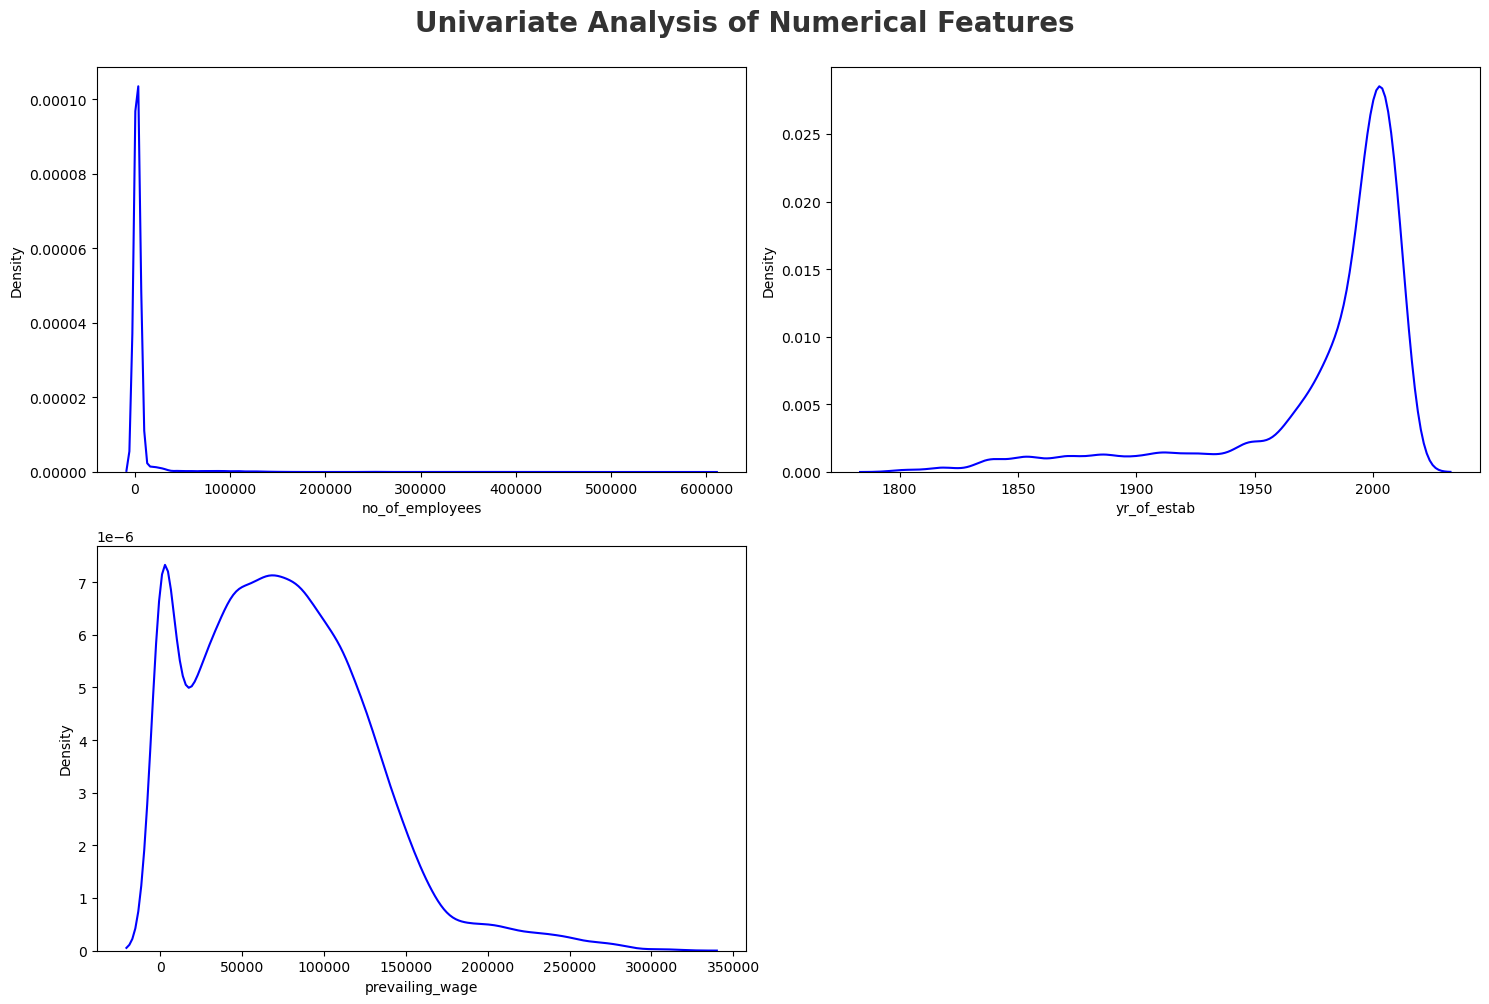

In [10]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(num_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[num_features[i]],color='blue')
    plt.xlabel(num_features[i])
    plt.tight_layout()

Univariate Analysis for Categorical features

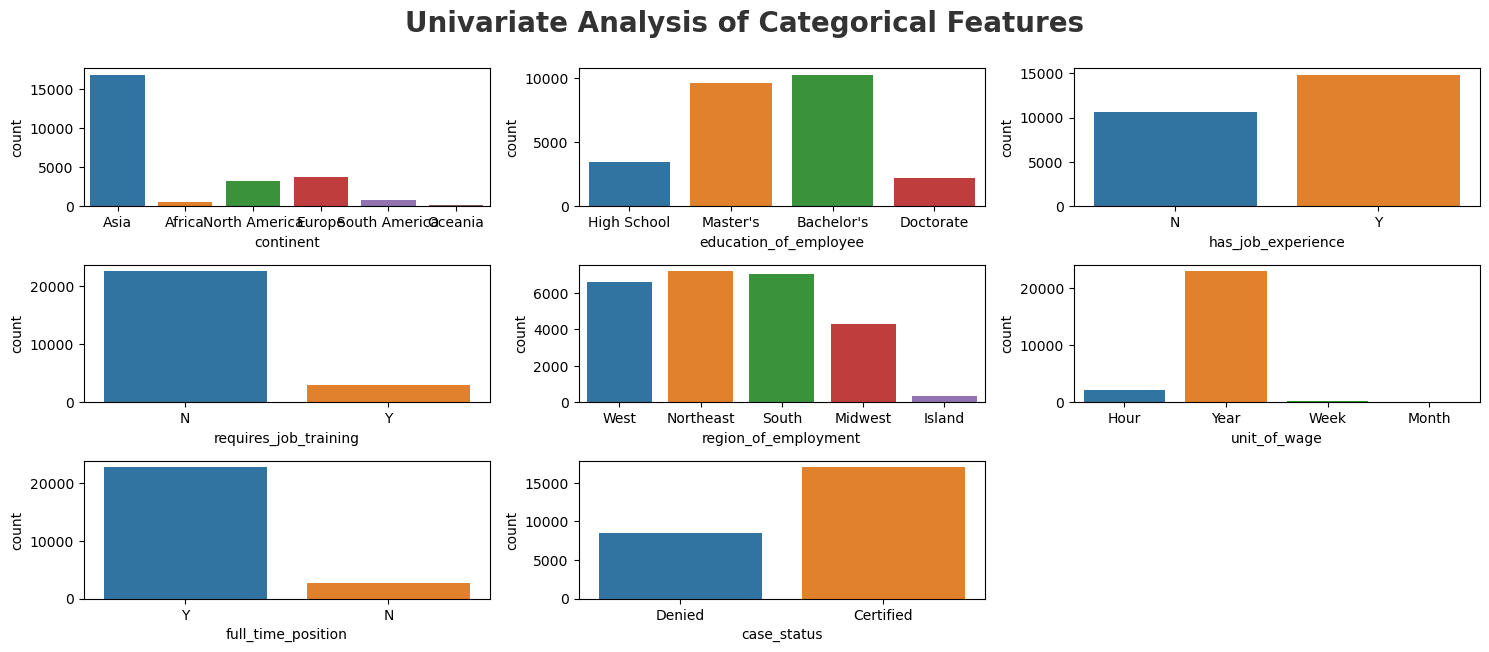

In [11]:
cat_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(cat_features)):
    plt.subplot(4,3,i+1)
    sns.countplot(x=df[cat_features[i]])
    plt.xlabel(cat_features[i])
    plt.tight_layout()

# Bivariate Analysis

In [12]:
for i in cat_features:
    if (df[i].nunique()) == 2:
        print(i)

has_job_experience
requires_job_training
full_time_position
case_status


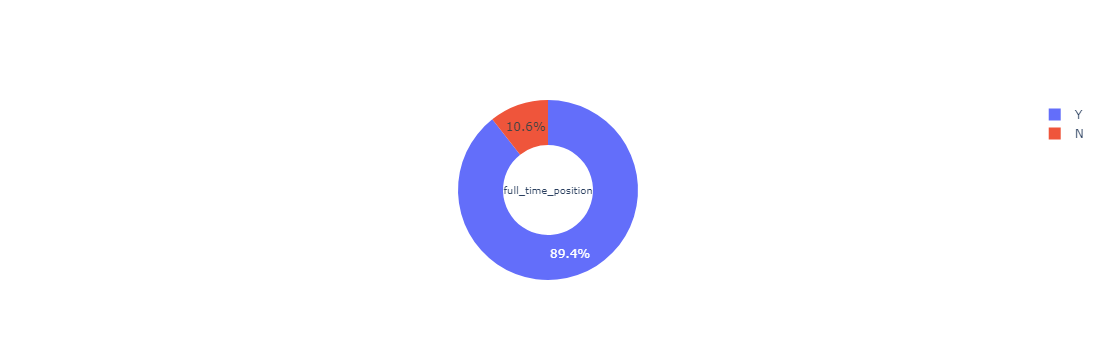

In [13]:
go.Figure(data=[go.Pie(labels=df["full_time_position"].value_counts(normalize=True).index,
                               values=df["full_time_position"].value_counts(normalize=True).values,hole=.5,
                               title="full_time_position")])

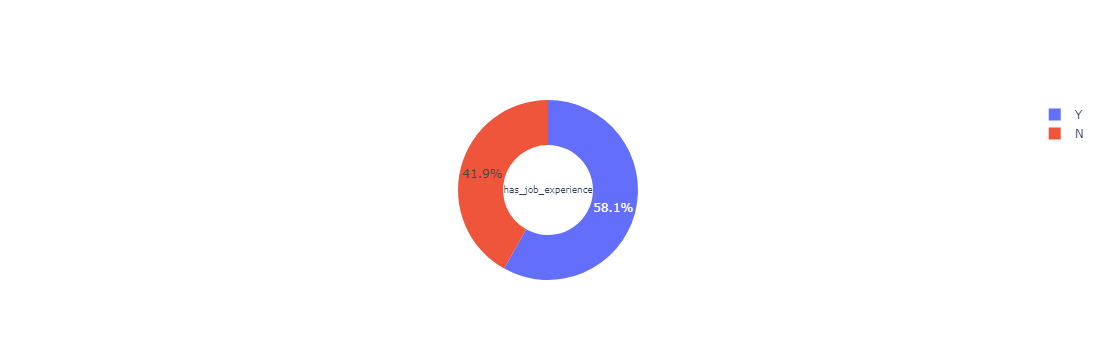

In [14]:
go.Figure(data=[go.Pie(labels=df["has_job_experience"].value_counts(normalize=True).index,
                               values=df["has_job_experience"].value_counts(normalize=True).values,hole=.5,
                               title="has_job_experience")])

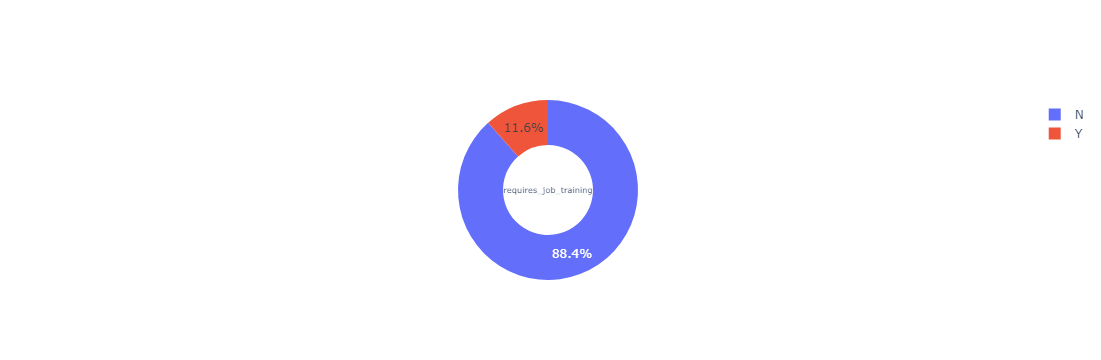

In [15]:
go.Figure(data=[go.Pie(labels=df["requires_job_training"].value_counts(normalize=True).index,
                               values=df["requires_job_training"].value_counts(normalize=True).values,hole=0.5,
                               title="requires_job_training")])

# Multivariate Analysis

In [16]:
discrete_features=[i for i in num_features if len(df[i].unique())<=25]
continuous_features=[i for i in num_features if len(df[i].unique())>25]

print("There are {} Discrete features : {} ".format(len(discrete_features),discrete_features))
print("\nThere are {} Continuous features : {} ".format(len(continuous_features),continuous_features))

There are 0 Discrete features : [] 

There are 3 Continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 


## Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are dependent (Correalted)

In [17]:
from scipy.stats import chi2_contingency
chi2_test = []

for i in cat_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[i]))[1] < 0.05 :
        chi2_test.append("Reject Null Hypothesis - Correlated ")
    else:
        chi2_test.append("Reject Alternative Hypothesis - No-Correlation ")

In [18]:
chi2_test_result = pd.DataFrame(data=[cat_features,chi2_test]).T
chi2_test_result.columns=["categorical_columns","result"]
chi2_test_result

,categorical_columns,result
0,continent,Reject Null Hypothesis - Correlated
1,education_of_employee,Reject Null Hypothesis - Correlated
2,has_job_experience,Reject Null Hypothesis - Correlated
3,requires_job_training,Reject Alternative Hypothesis - No-Correlation
4,region_of_employment,Reject Null Hypothesis - Correlated
5,unit_of_wage,Reject Null Hypothesis - Correlated
6,full_time_position,Reject Null Hypothesis - Correlated
7,case_status,Reject Null Hypothesis - Correlated


**Report** 
* Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

# Visualize the Target Variable

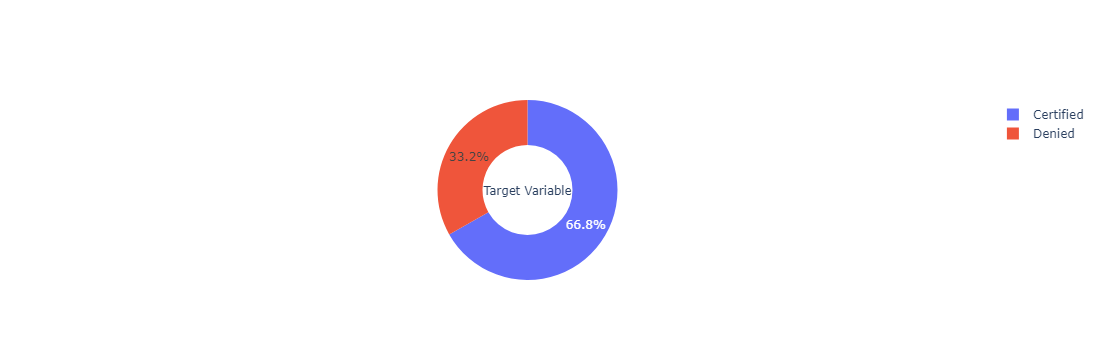

In [19]:
go.Figure(data=[go.Pie(labels=df.case_status.value_counts(normalize=True).index,
                       values=df.case_status.value_counts(normalize=True).values,hole=0.5,
                       title = "Target Variable")])

## Missing values

In [20]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

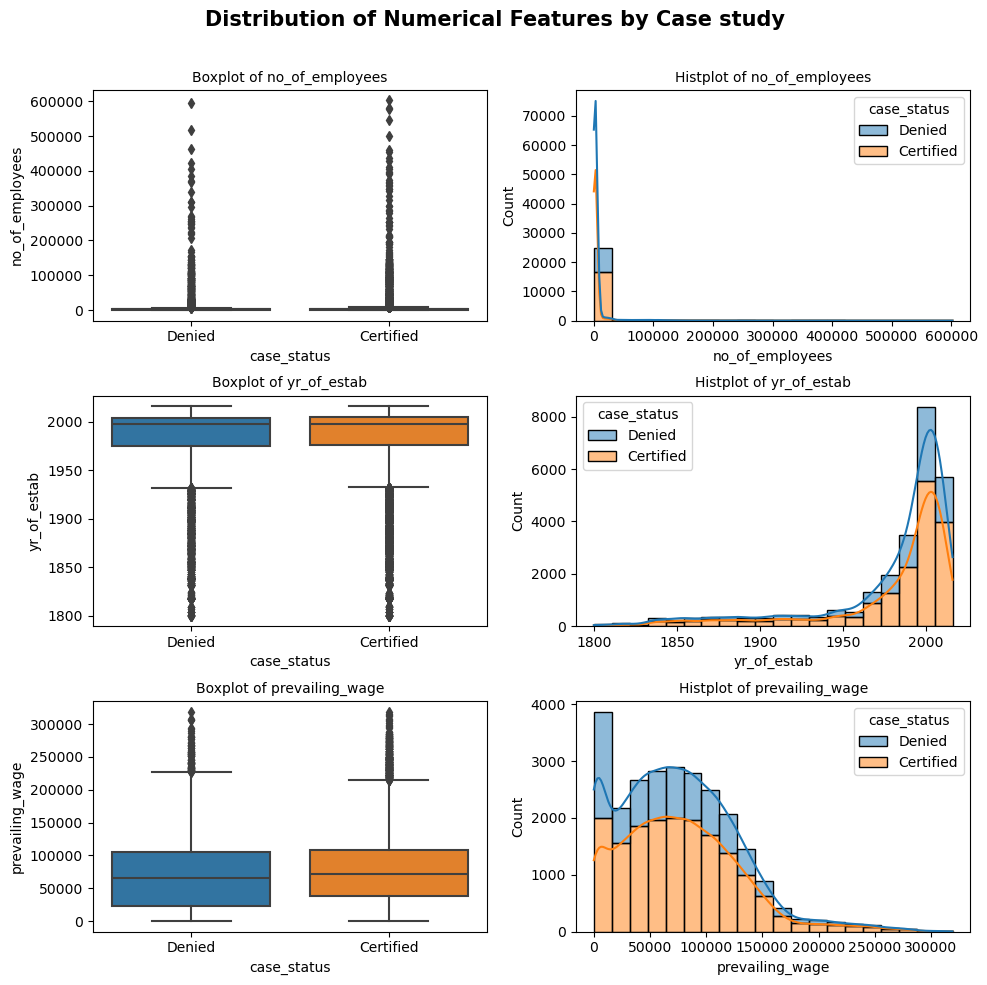

In [21]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
fig.suptitle("Distribution of Numerical Features by Case study",fontsize=15,fontweight='bold',ha='center')

for i,col in enumerate(num_features):
    sns.boxplot(data=df,x='case_status',y=col,ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}',fontsize=10)
    sns.histplot(data=df,x=col,hue='case_status',kde=True,bins=20,multiple='stack',ax=ax[i,1])
    ax[i,1].set_title(f'Histplot of {col}',fontsize=10)

fig.tight_layout()
fig.subplots_adjust(top=0.90)

* **No of Employees has many outliers which can be Handled in Feature Engineering and `no_of_employees` is Right Skewed.**
* **`yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.**
* **`prevailing_wage` is right skewed with outliers above upper bound of box plot.**
* **There are No missing values in the dataset.**
* **The `case_id` column can be deleted because each row has unique values.**
* **The `case_status` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

### 4.2 Does applicant Continent has any impact on Visa status ?

In [22]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

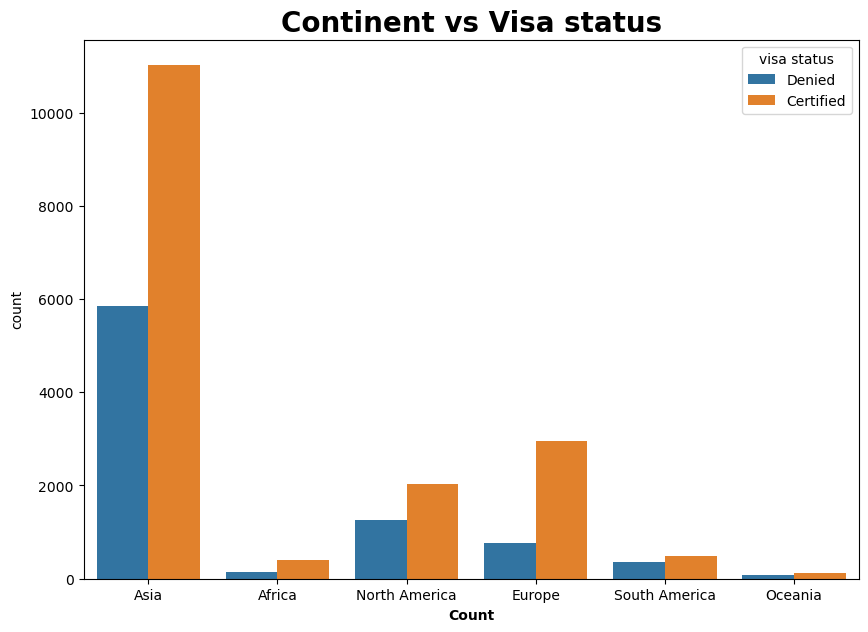

In [23]:
plt.subplots(figsize=(10,7))
sns.countplot(x="continent",hue="case_status",data=df)
plt.title("Continent vs Visa status",weight="bold",fontsize=20)
plt.xlabel("Continent",weight="bold")
plt.xlabel("Count",weight="bold")
plt.legend(title="visa status",fancybox=True)
plt.show()

<Axes: xlabel='continent', ylabel='count'>

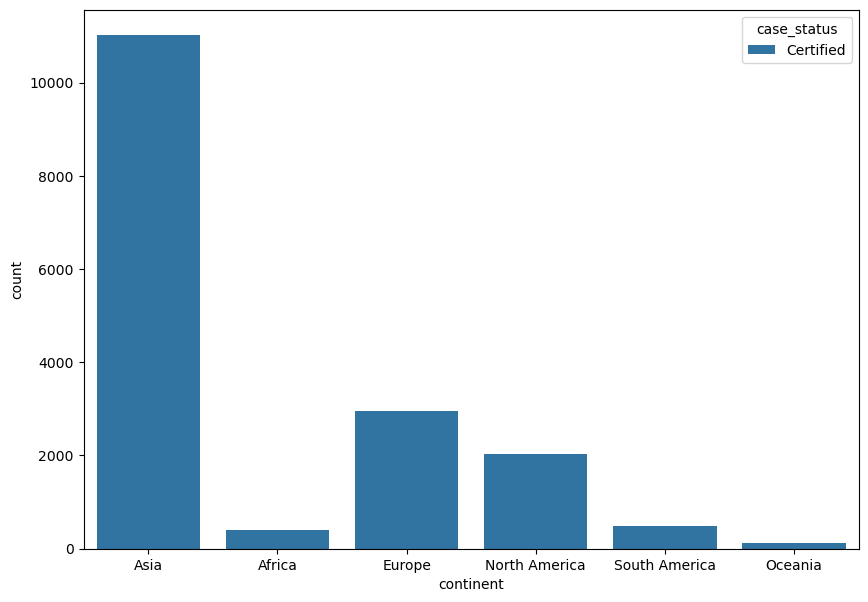

In [40]:
plt.subplots(figsize=(10,7))
sns.countplot(x='continent',hue='case_status',data=df[df['case_status']=='Certified'])

### 4.3 Does applicant education has any impact on Visa status ?

In [42]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

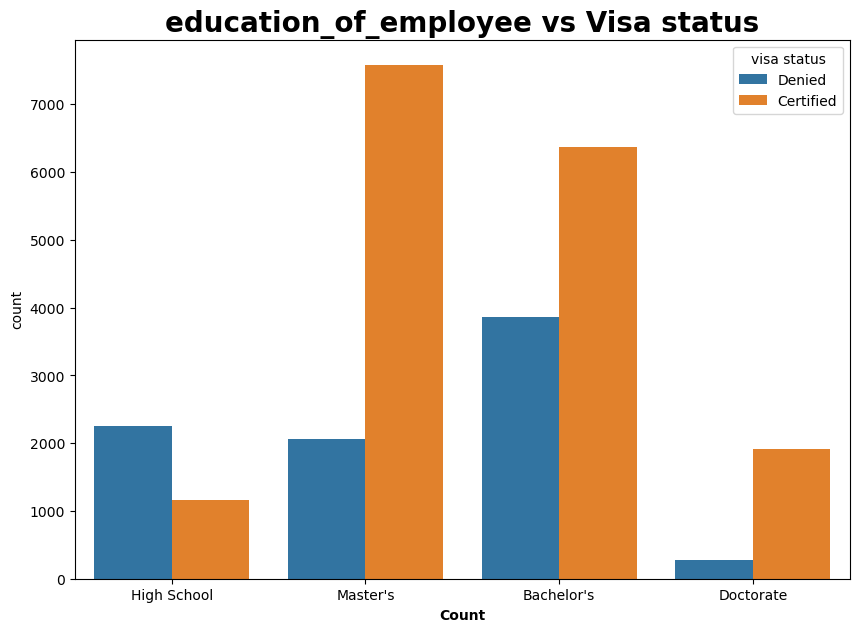

In [43]:
plt.subplots(figsize=(10,7))
sns.countplot(x="education_of_employee",hue="case_status",data=df)
plt.title("education_of_employee vs Visa status",weight="bold",fontsize=20)
plt.xlabel("education_of_employee",weight="bold")
plt.xlabel("Count",weight="bold")
plt.legend(title="visa status",fancybox=True)
plt.show()

**Insights**
- education status has high impact
- `Doctorate` and `Master's` graduates have higher cange of being accepted then the others.

### 4.4 Does applicant's previous work experience has any impact on Visa status ?

In [45]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

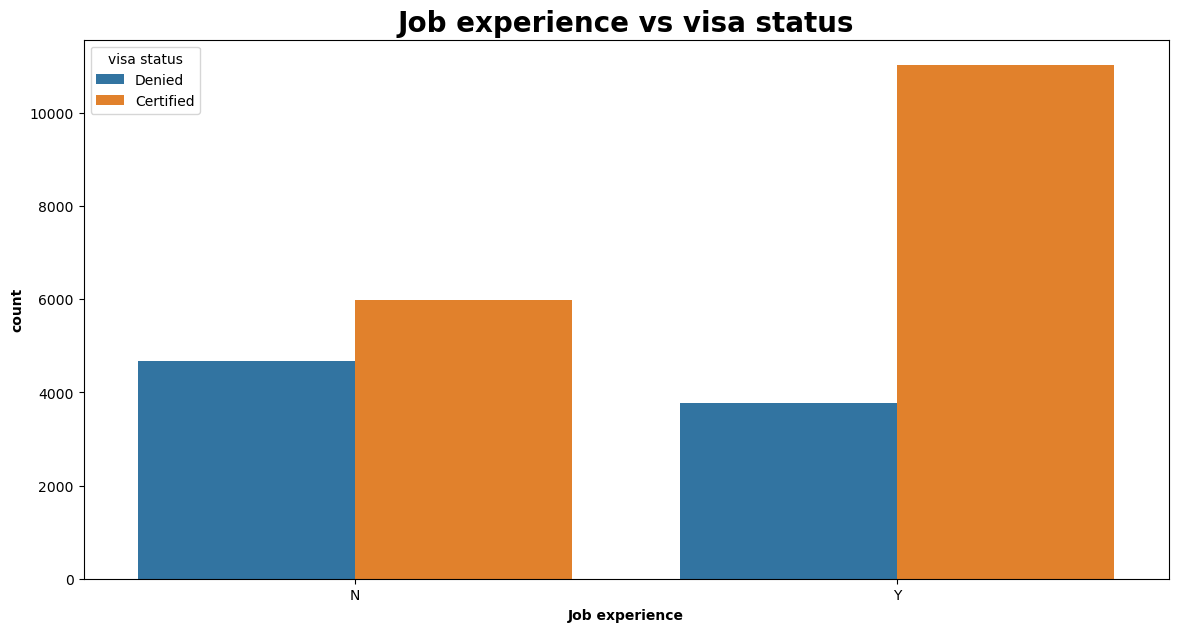

In [46]:
plt.subplots(figsize=(14,7))
sns.countplot(x='has_job_experience',hue='case_status',data=df)
plt.title("Job experience vs visa status",weight='bold',fontsize=20)
plt.xlabel("Job experience",weight='bold')
plt.ylabel("count",weight='bold')
plt.legend(title='visa status',fancybox=True)
plt.show()

**Report**
* People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
* People with No previous work experience has been certified 56% and denied 43%.
* This means work experience has effect on Visa status.
* There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

### 4.5 If the Employee requires job training, does it make any impact on visa status?

In [47]:
df.groupby("requires_job_training")['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

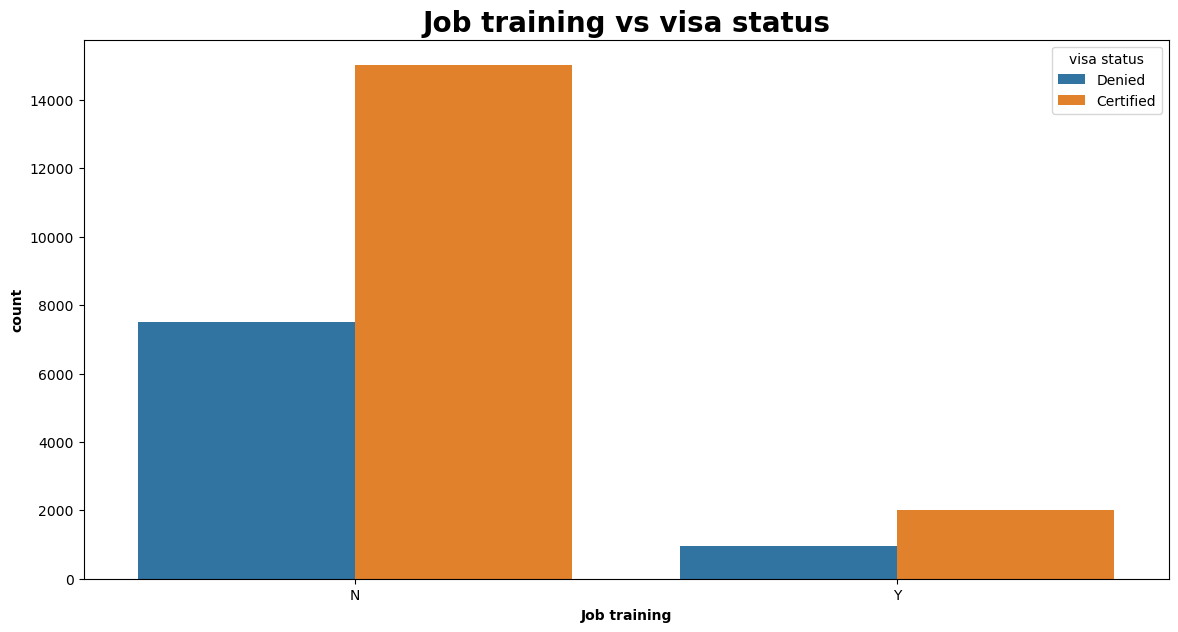

In [48]:
plt.subplots(figsize=(14,7))
sns.countplot(x='requires_job_training',hue='case_status',data=df)
plt.title("Job training vs visa status",weight='bold',fontsize=20)
plt.xlabel("Job training",weight='bold')
plt.ylabel("count",weight='bold')
plt.legend(title='visa status',fancybox=True)
plt.show()

In [50]:
df.groupby("unit_of_wage")['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

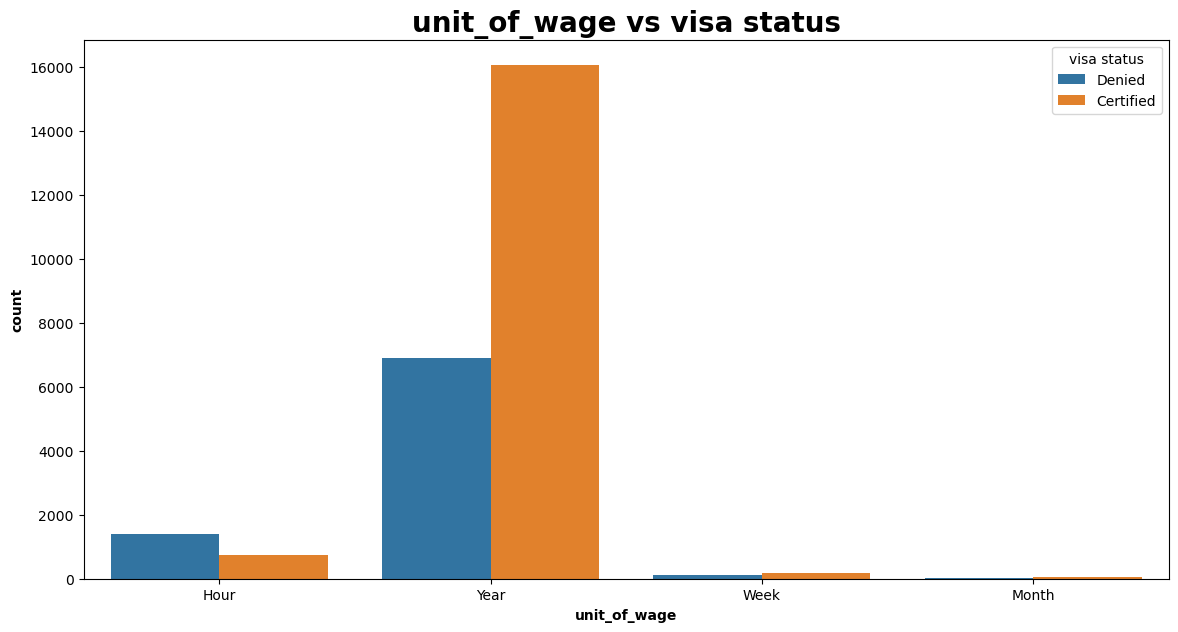

In [51]:
plt.subplots(figsize=(14,7))
sns.countplot(x='unit_of_wage',hue='case_status',data=df)
plt.title("unit_of_wage vs visa status",weight='bold',fontsize=20)
plt.xlabel("unit_of_wage",weight='bold')
plt.ylabel("count",weight='bold')
plt.legend(title='visa status',fancybox=True)
plt.show()

**Report**
* For employees who applied for hourly pay 65% of them were denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a higher chance of yearly contract than other and immediately followed by week and month.

### 4.7 Does Region of employment has impact on Visa status ?

In [52]:
df.groupby("region_of_employment")['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

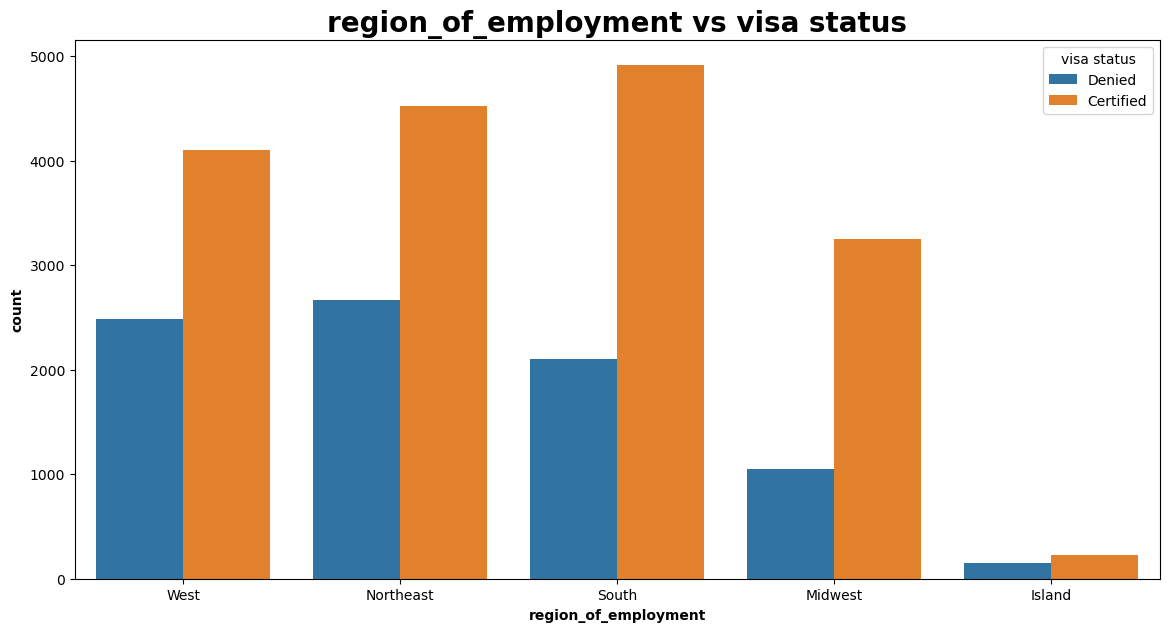

In [58]:
plt.subplots(figsize=(14,7))
sns.countplot(x='region_of_employment',hue='case_status',data=df)
plt.title("region_of_employment vs visa status",weight='bold',fontsize=20)
plt.xlabel("region_of_employment",weight='bold')
plt.ylabel("count",weight='bold')
plt.legend(title='visa status',fancybox=True)
plt.show()

**Report** 
* As per chart all the region have very similar pattern of getting Visa certified and Denied.

### 4.8 Does Prevailing wage has any impact on Visa status ?

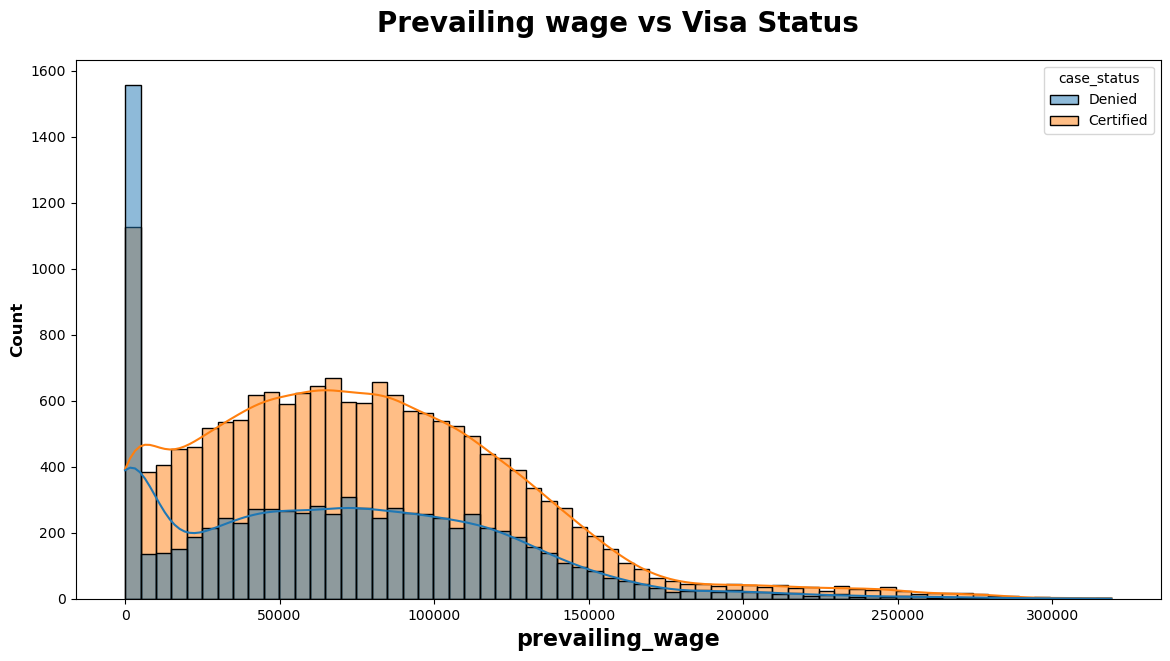

In [74]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("prevailing_wage", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

#### 4.8.1 Prevailing wage based on Education

In [63]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


**Report**
* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.

#### 4.8.2 Prevailing wage based on Job experience

In [65]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,75464.159920
Y,73728.405363


**Report**
* Suprisingly people who has less job experience has more prevailing wage.

#### 4.8.3 Prevailing wage based on Continent

In [68]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


**Report**
* Average salary of people from Asia is higher than other continents.

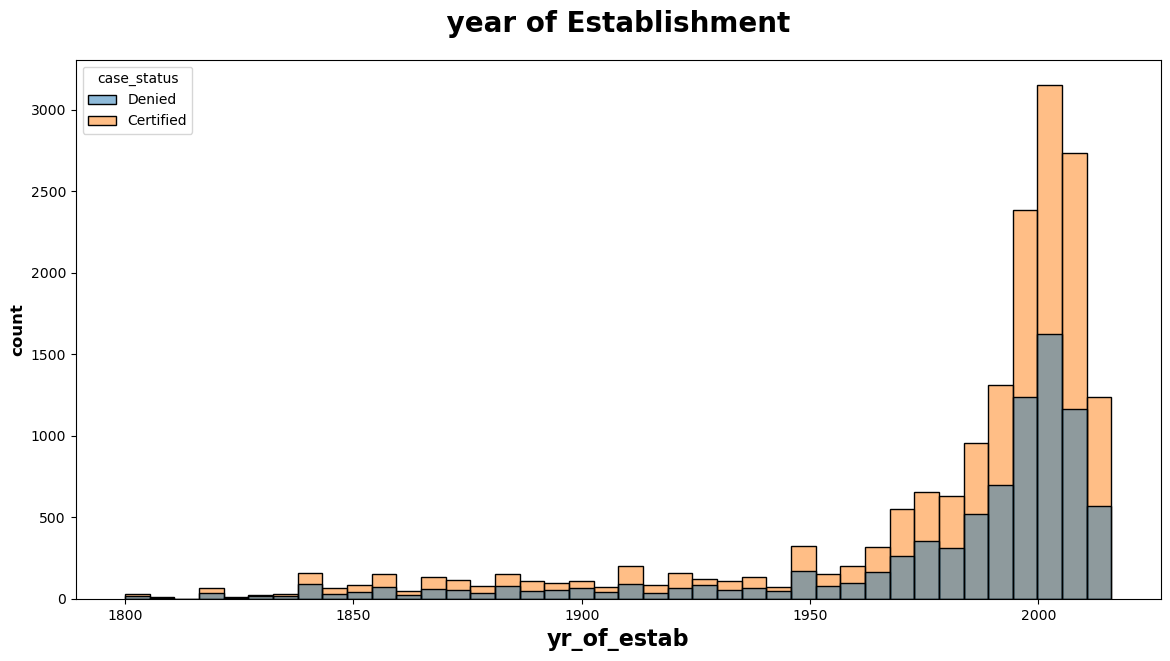

In [78]:
plt.subplots(figsize=(14,7))
sns.histplot(x="yr_of_estab",hue="case_status", data=df,bins=40)
plt.title(" year of Establishment ", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("count", weight="bold", fontsize=12)
plt.show()

**Insights**
* Many companies were established after year 2000.

### Final Report 
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.